Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Manuela Bastidas Olivares y Nicolás Guarín-Zapata 2024.

# Regresión lineal en PyTorch

Basado en el siguiente tutorial

https://machinelearningmastery.com/training-a-linear-regression-model-in-pytorch/

In [1]:
# Esto permite tener gráficos interactivos en
# el caso de correrse en Google Colab
if 'google.colab' in str(get_ipython()):
    %pip install ipympl
    from google.colab import output
    output.enable_custom_widget_manager()

In [2]:
%matplotlib widget

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [4]:
if 'google.colab' in str(get_ipython()):
    style = "https://raw.githubusercontent.com/nicoguaro/pinns_mapi-3/main/notebooks/clean.mplstyle"
else:
    style = "./clean.mplstyle"
plt.style.use(style)

## Generación de datos

Creemos una función entre -10 y 10 con pendiente 3

In [5]:
npts = 1000
X = torch.linspace(-10, 10, npts).view(-1, 1)
fun = 3 * X

Agreguemos algo de ruido a los datos

In [6]:
Y = fun + 3 * torch.randn(X.size())

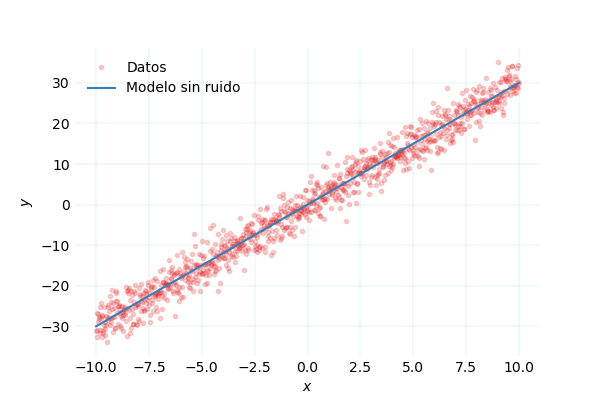

In [7]:
plt.figure()
plt.plot(X.numpy(), Y.numpy(), lw=0, marker=".", alpha=0.2)
plt.plot(X.numpy(), fun.numpy())
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(["Datos", "Modelo sin ruido"]);

## Modelo

Definamos un modelo lineal

In [8]:
def forward(x):
    return w * x

La función de pérdida es el error cuadrático medio

$$f(x; w) = |y - wx|^2 \, ,$$

In [9]:
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

In [10]:
w = torch.tensor(10.0, requires_grad=True)

Vamos a implementar el descenso del gradiente de forma manual
para este problema. En este caso, tenemos que los pesos
se pueden actualizar de la siguiente manera

$$w_{i + 1} = w_{i} - \lambda \nabla f(w_{i})\, ,$$

donde $\lambda$ es la tasa de aprendizaje.

In [11]:
step_size = 0.01
loss_list = []
niter = 20

In [12]:
for cont in range (niter):
    Y_pred = forward(X)
    loss = criterion(Y_pred, Y)
    loss_list.append(loss.item())
    loss.backward()
    w.data = w.data - step_size * w.grad.data
    w.grad.data.zero_()

    if cont % 1 == 0:
        print('{},\t{},\t{}'.format(cont, loss.item(), w.item()))

0,	1640.6492919921875,	5.330204963684082
1,	188.30557250976562,	3.779839515686035
2,	28.223791122436523,	3.265120267868042
3,	10.579076766967773,	3.0942342281341553
4,	8.634222030639648,	3.0375001430511475
5,	8.419852256774902,	3.018664598464966
6,	8.396224021911621,	3.012411117553711
7,	8.393620491027832,	3.0103349685668945
8,	8.393333435058594,	3.009645700454712
9,	8.393301963806152,	3.0094168186187744
10,	8.393298149108887,	3.00934100151062
11,	8.393298149108887,	3.0093157291412354
12,	8.39329719543457,	3.009307384490967
13,	8.393298149108887,	3.0093045234680176
14,	8.393298149108887,	3.009303569793701
15,	8.393298149108887,	3.009303331375122
16,	8.393298149108887,	3.009303331375122
17,	8.393298149108887,	3.009303331375122
18,	8.393298149108887,	3.009303331375122
19,	8.393298149108887,	3.009303331375122


Grafiquemos la función de pérdida luego de cada iteración

Text(0, 0.5, 'Pérdida')

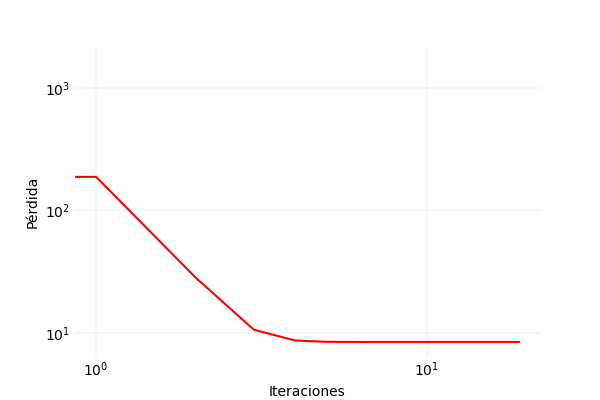

In [13]:
plt.figure()
plt.loglog(loss_list, 'r')
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")

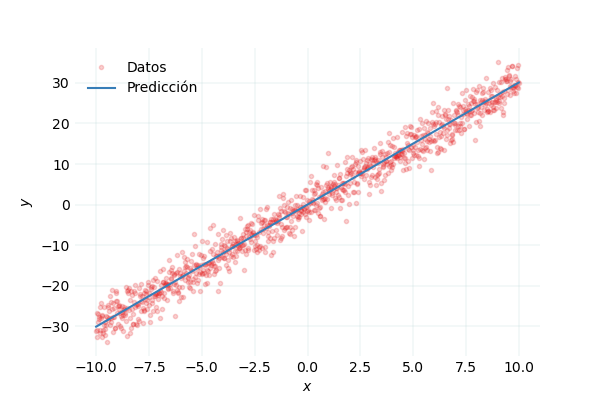

In [14]:
plt.figure()
plt.plot(X.numpy(), Y.numpy(), lw=0, marker=".", alpha=0.2)
plt.plot(X.numpy(), forward(X).detach().numpy())
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(["Datos", "Predicción"]);